<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/bivariate_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('http://ishelp.info/data/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
bmi = df['bmi']
charges = df['charges']
age = df['age']
correlation = np.corrcoef(bmi, charges)[0, 1]
correlation = np.corrcoef(age, charges)[0, 1]
correlation

np.float64(0.29900819333064754)

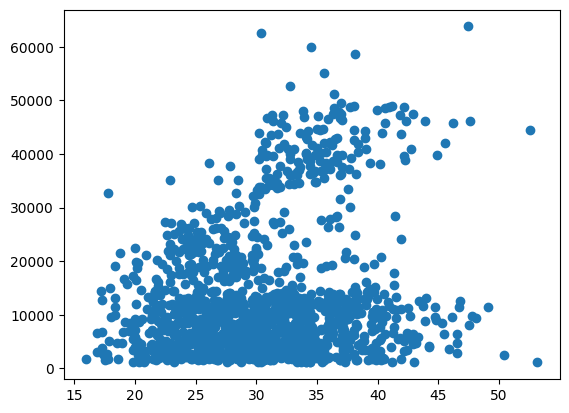

In [6]:
plt.scatter(bmi, charges)
plt.show()

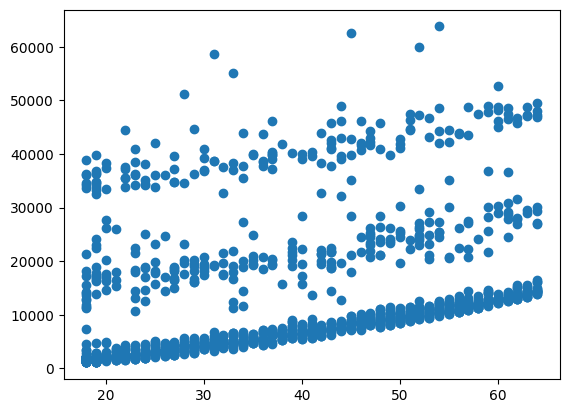

In [7]:
plt.scatter(age, charges)

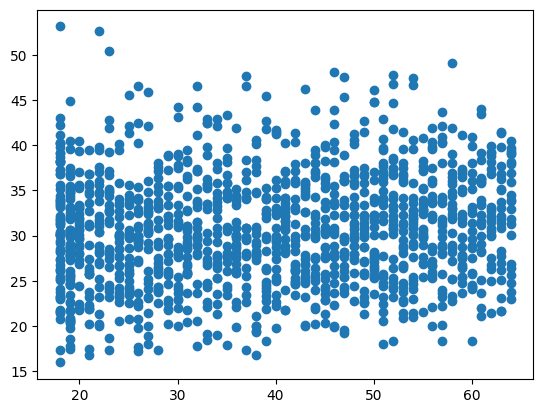

In [8]:
plt.scatter(age, bmi)

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
south_west = np.mean(df[df['region'] == 'southwest']['charges'])
south_east = np.mean(df[df['region'] == 'southeast']['charges'])
north_east = np.mean(df[df['region'] == 'northeast']['charges'])
north_west = np.mean(df[df['region'] == 'northwest']['charges'])

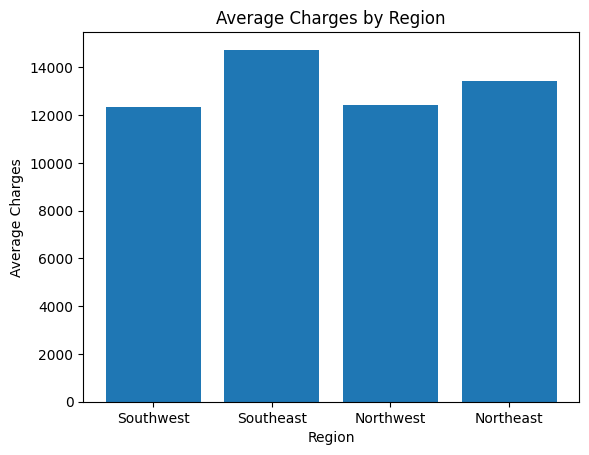

In [11]:
regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
means = [south_west, south_east, north_west, north_east]

plt.bar(regions, means)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')
plt.show()

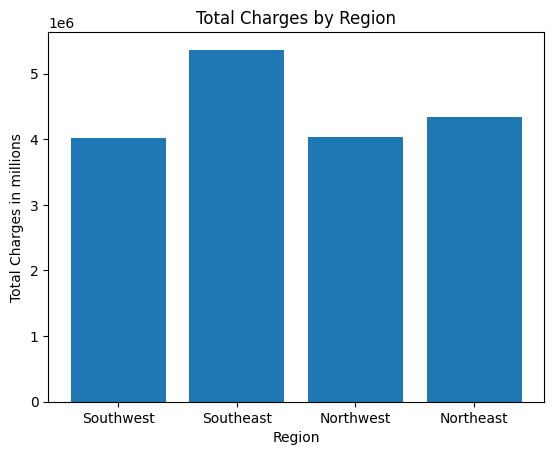

In [12]:
#total charges per region
south_west = np.sum(df[df['region'] == 'southwest']['charges'])
south_east = np.sum(df[df['region'] == 'southeast']['charges'])
north_east = np.sum(df[df['region'] == 'northeast']['charges'])
north_west = np.sum(df[df['region'] == 'northwest']['charges'])

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
sums = [south_west, south_east, north_west, north_east]

plt.bar(regions, sums)
plt.xlabel('Region')
plt.ylabel('Total Charges in millions')
plt.title('Total Charges by Region')
plt.show()

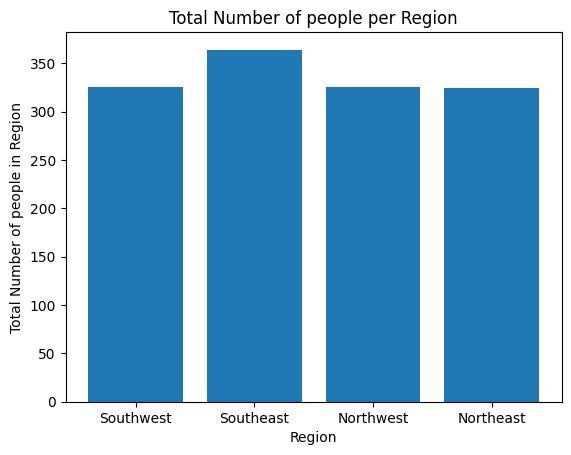

In [13]:
#total number of people per region

south_west = len(df[df['region'] == 'southwest']['charges'])
south_east = len(df[df['region'] == 'southeast']['charges'])
north_east = len(df[df['region'] == 'northeast']['charges'])
north_west = len(df[df['region'] == 'northwest']['charges'])

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
total = [south_west, south_east, north_west, north_east]

plt.bar(regions, total)
plt.xlabel('Region')
plt.ylabel('Total Number of people in Region')
plt.title('Total Number of people per Region')
plt.show()

In [14]:
len(df)

1338

In [15]:
age_groups_nums = { i: len(df[df['age'] == i]) for i in age.unique()}
ages = list(age.unique())
total_number_per_age_group = [age_groups_nums[i] for i in age_groups_nums.keys()]

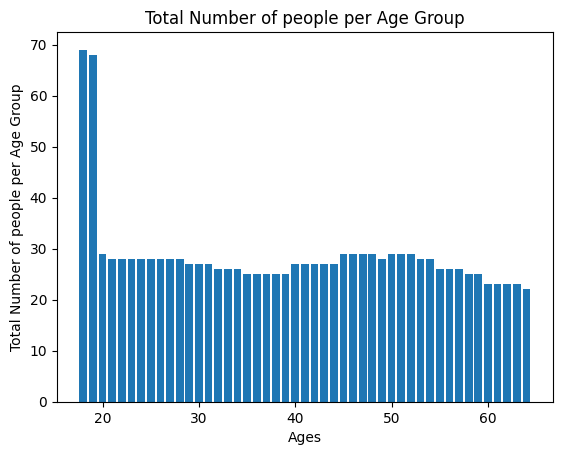

In [16]:
plt.bar(ages, total_number_per_age_group)
plt.xlabel('Ages')
plt.ylabel('Total Number of people per Age Group')
plt.title('Total Number of people per Age Group')
plt.show()

In [17]:
len(df[df['age'] == 60])

23

In [18]:
charges_per_age_group = { i: np.mean(df[df['age'] == i]['charges']) for i in age.unique()}
new_charges = [mean for mean in charges_per_age_group.values()]

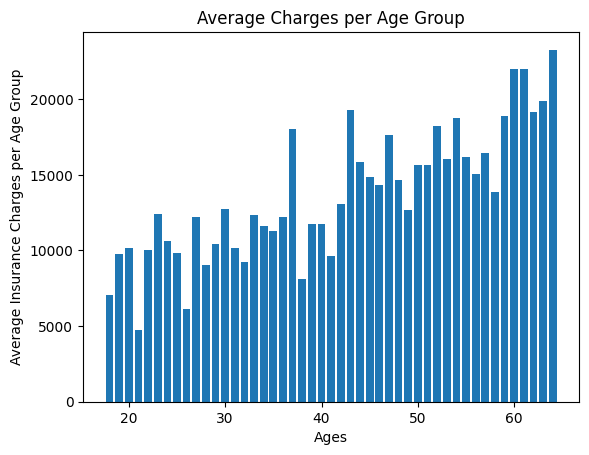

In [19]:
plt.bar(ages, new_charges)
plt.xlabel('Ages')
plt.ylabel('Average Insurance Charges per Age Group')
plt.title('Average Charges per Age Group')
plt.show()

In [20]:
heights = [1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00]
weights = [50, 60, 58, 65, 72, 80, 90, 100, 110, 120]
bmis = [20.8, 23.4, 21.3, 22.5, 23.5, 24.7, 26.3, 27.7, 28.9, 30.0]


In [21]:
np.corrcoef(heights, weights, bmis)

array([[1.        , 0.98411543],
       [0.98411543, 1.        ]])

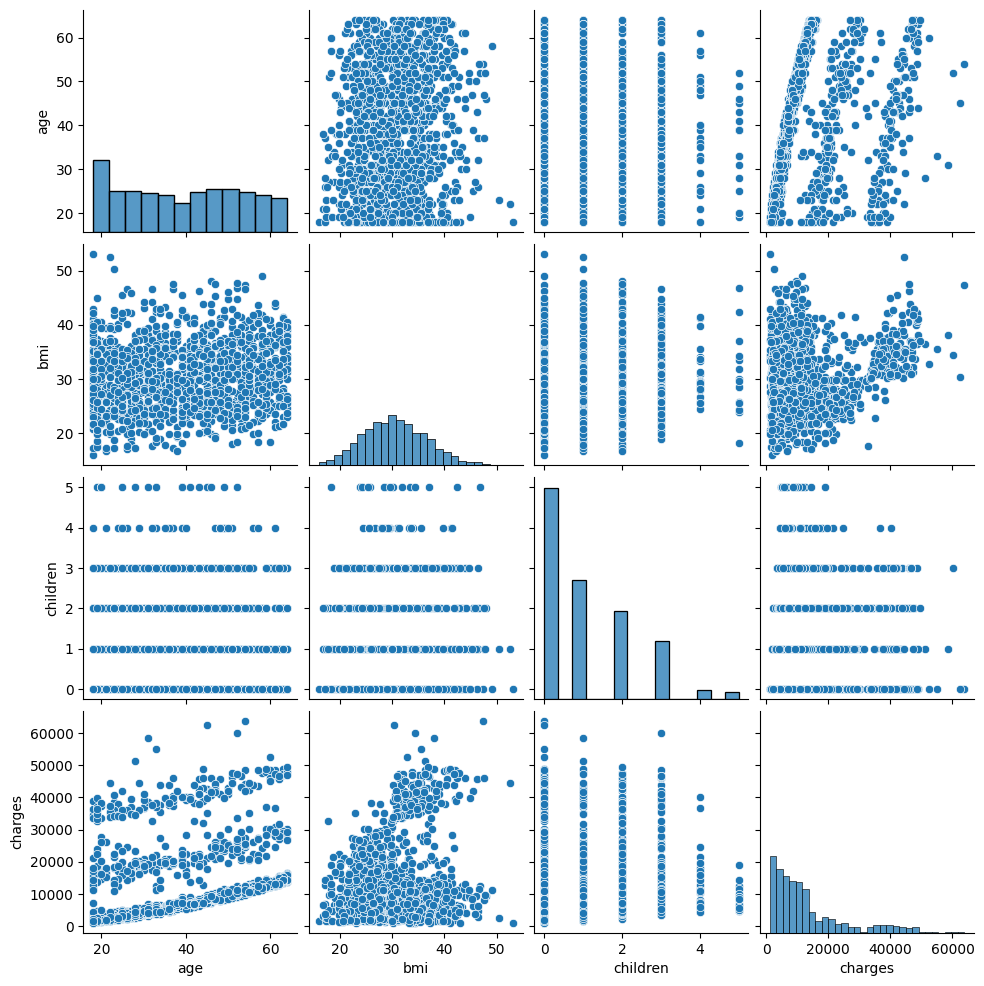

In [23]:
sns.pairplot(df)

<Axes: xlabel='bmi', ylabel='Count'>

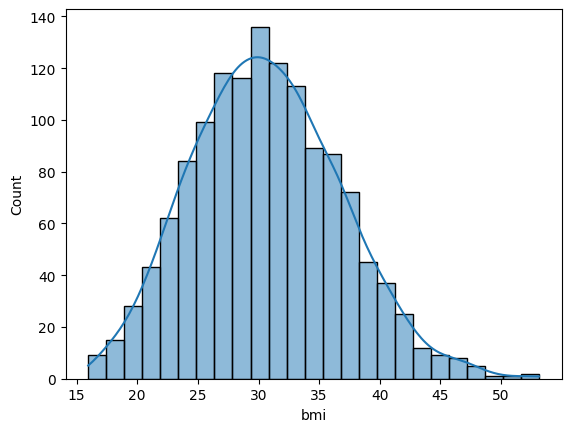

In [26]:
sns.histplot(df['bmi'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

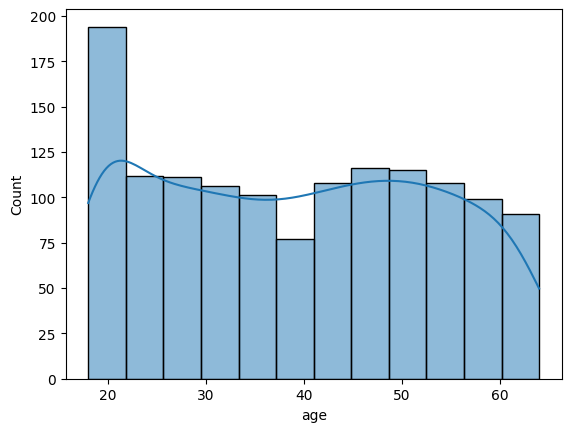

In [27]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

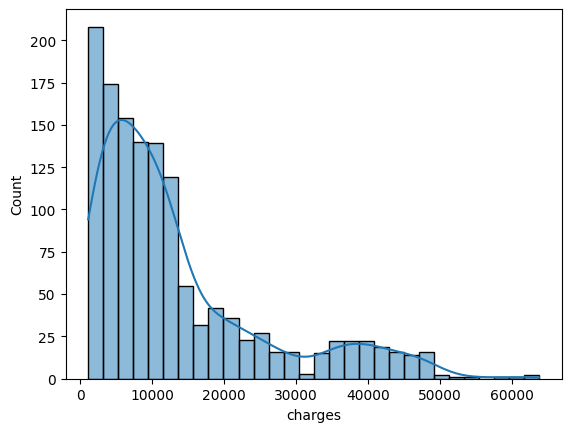

In [28]:
sns.histplot(df['charges'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

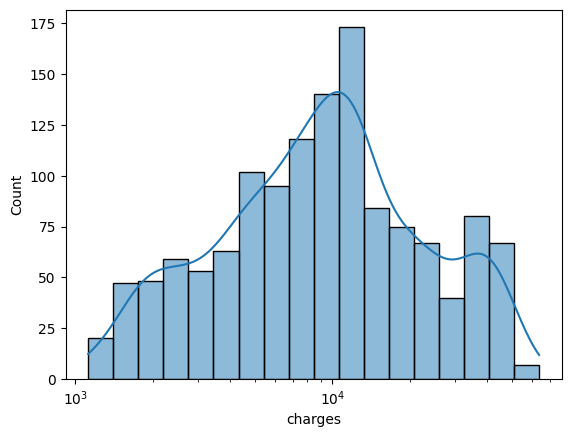

In [29]:
sns.histplot(df['charges'], kde=True, log_scale=True)

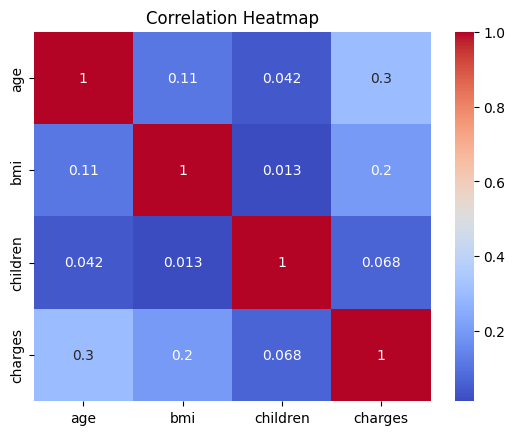

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [38]:
corr, p = stats.pearsonr(df.charges, df.age)
corr, p

(np.float64(0.29900819333064754), np.float64(4.886693331718529e-29))

In [42]:
corr_df = pd.DataFrame(columns = ['correlation', 'p_value'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = r, p

corr_df

,correlation,p_value
age,0.299008,4.886693e-29
bmi,0.198341,2.459086e-13
children,0.067998,1.285213e-02
charges,1.000000,0.000000e+00


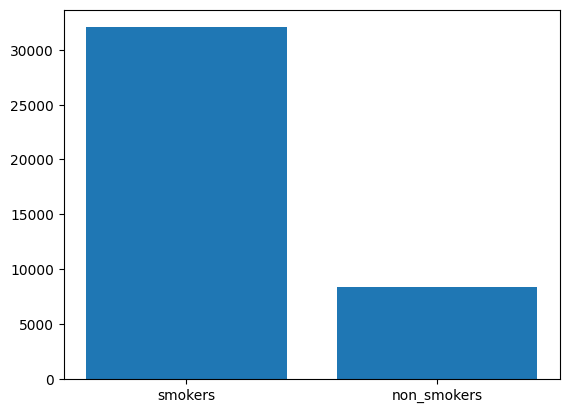

In [46]:
smokers =df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']
count_smokers = len(smokers)
count_non_smokers = len(non_smokers)
mean_smoker_payments= np.mean(smokers)
mean_non_smoker_payments = np.mean(non_smokers)

charges = [mean_smoker_payments, mean_non_smoker_payments]
counts = [count_smokers, count_non_smokers]
labels = ["smokers", "non_smokers"]

plt.bar(labels, charges)
plt.show()

<BarContainer object of 2 artists>

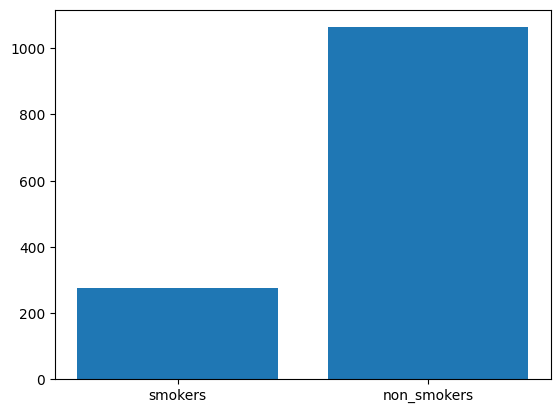

In [47]:
plt.bar(labels, counts)

<Axes: xlabel='charges', ylabel='Count'>

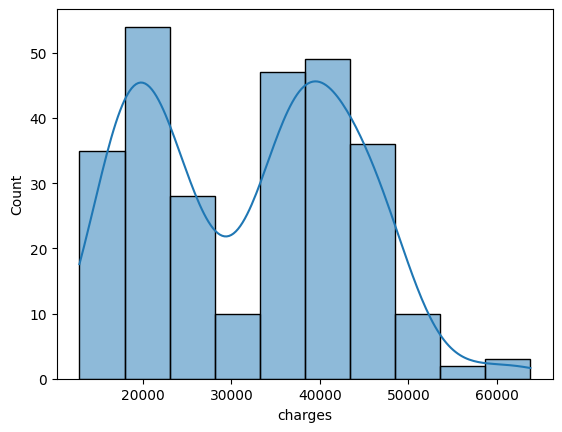

In [48]:
sns.histplot(smokers, kde=True)

<Axes: xlabel='charges', ylabel='Count'>

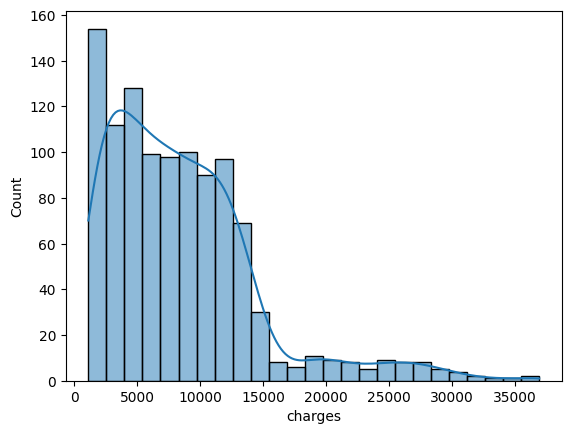

In [49]:
sns.histplot(non_smokers, kde=True)

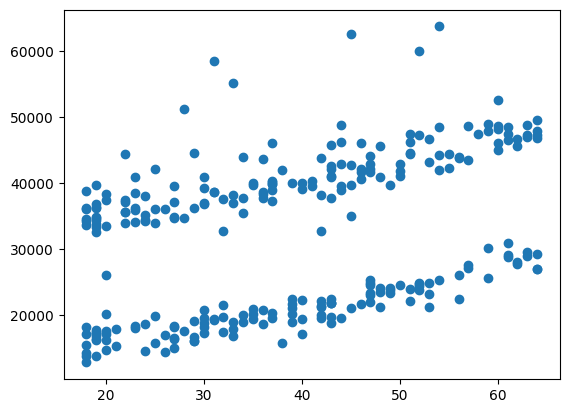

In [51]:
smokers_age =df[df['smoker'] == 'yes']['age']
non_smokers_age = df[df['smoker'] == 'no']['age']

plt.scatter(smokers_age, smokers)
plt.show()


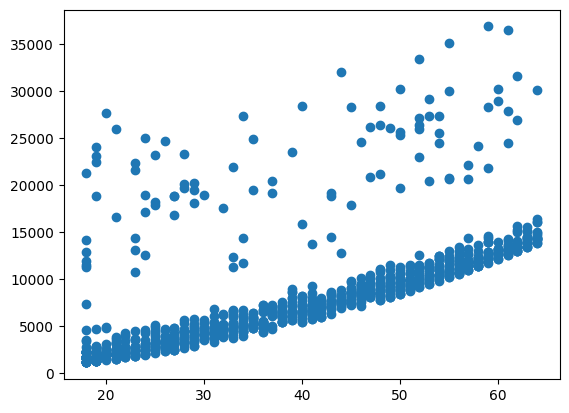

In [52]:
plt.scatter(non_smokers_age, non_smokers)
plt.show()

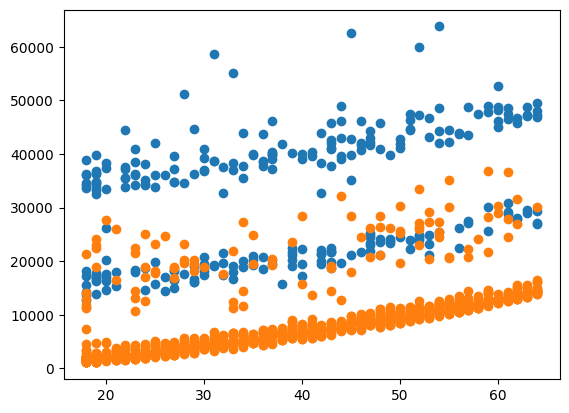

In [53]:
plt.scatter(smokers_age, smokers)
plt.scatter(non_smokers_age, non_smokers)
plt.show()

array([0, 1, 3, 2, 5, 4])

In [56]:
# Smokers by number of children
no_child_smokers = df[(df['smoker'] == 'yes') & (df['children'] == 0)]
one_child_smokers = df[(df['smoker'] == 'yes') & (df['children'] == 1)]
two_children_smokers = df[(df['smoker'] == 'yes') & (df['children'] == 2)]
three_children_smokers = df[(df['smoker'] == 'yes') & (df['children'] == 3)]
four_children_smokers = df[(df['smoker'] == 'yes') & (df['children'] == 4)]
five_children_smokers = df[(df['smoker'] == 'yes') & (df['children'] == 5)]

# Non-smokers by number of children
no_child_non_smokers = df[(df['smoker'] == 'no') & (df['children'] == 0)]
one_child_non_smokers = df[(df['smoker'] == 'no') & (df['children'] == 1)]
two_children_non_smokers = df[(df['smoker'] == 'no') & (df['children'] == 2)]
three_children_non_smokers = df[(df['smoker'] == 'no') & (df['children'] == 3)]
four_children_non_smokers = df[(df['smoker'] == 'no') & (df['children'] == 4)]
five_children_non_smokers = df[(df['smoker'] == 'no') & (df['children'] == 5)]


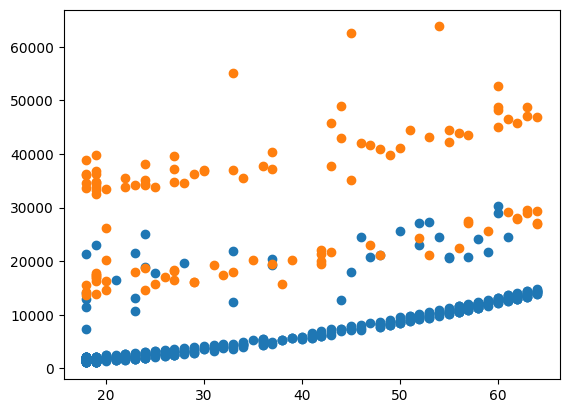

In [58]:
plt.scatter(no_child_non_smokers.age, no_child_non_smokers.charges)
plt.scatter(no_child_smokers.age, no_child_smokers.charges)
plt.show()

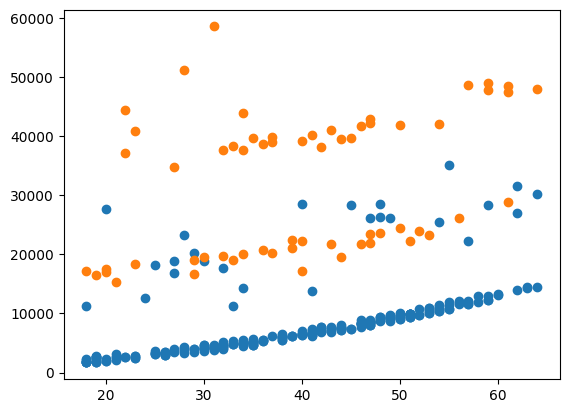

In [59]:
plt.scatter(one_child_non_smokers.age, one_child_non_smokers.charges)
plt.scatter(one_child_smokers.age, one_child_smokers.charges)
plt.show()

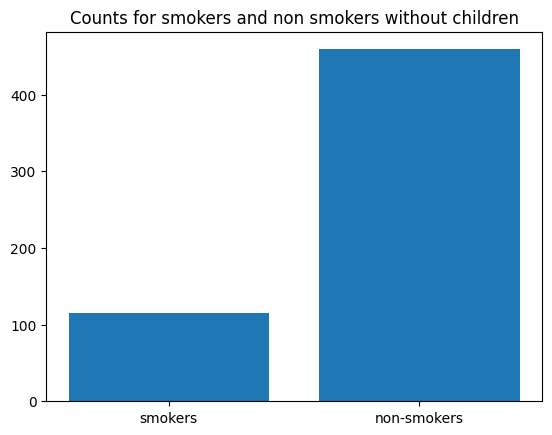

In [60]:
plt.bar(["smokers", "non-smokers"], [len(no_child_smokers), len(no_child_non_smokers)])
plt.title("Counts for smokers and non smokers without children")
plt.show()


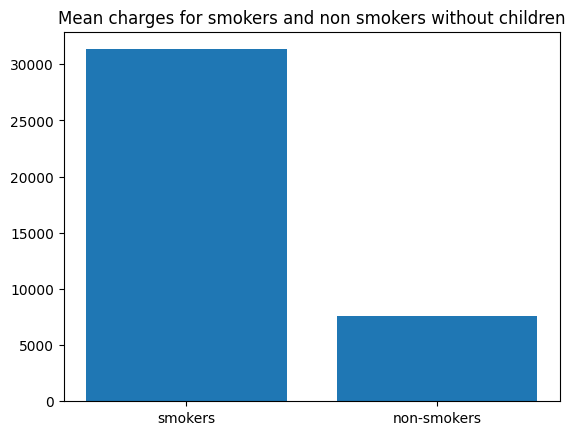

In [61]:
plt.bar(["smokers", "non-smokers"], [np.mean(no_child_smokers.charges), np.mean(no_child_non_smokers.charges)])
plt.title("Mean charges for smokers and non smokers without children")
plt.show()


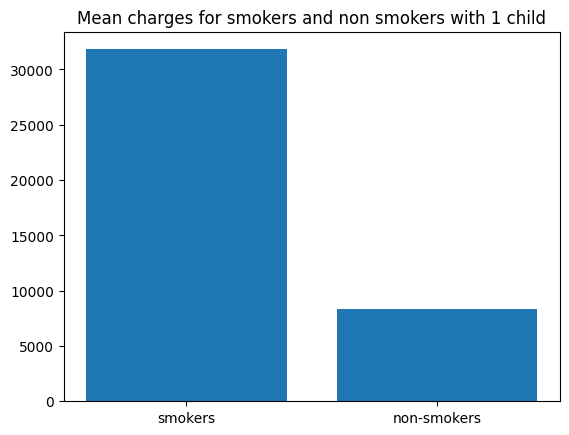

In [64]:
plt.bar(["smokers", "non-smokers"], [np.mean(one_child_smokers.charges), np.mean(one_child_non_smokers.charges)])
plt.title("Mean charges for smokers and non smokers with 1 child")
plt.show()

In [ ]:
plt.bar(["smokers", "non-smokers"], [len(one_child_smokers.charges), len(one_child_non_smokers.charges)])
plt.title("Mean charges for smokers and non smokers with 1 child")
plt.show()

In [65]:
# Smokers by number of children Should have programmed this not done it manually. But we live we learn
smokers_map = {
    0: df[(df['smoker'] == 'yes') & (df['children'] == 0)],
    1: df[(df['smoker'] == 'yes') & (df['children'] == 1)],
    2: df[(df['smoker'] == 'yes') & (df['children'] == 2)],
    3: df[(df['smoker'] == 'yes') & (df['children'] == 3)],
    4: df[(df['smoker'] == 'yes') & (df['children'] == 4)],
    5: df[(df['smoker'] == 'yes') & (df['children'] == 5)]
}


non_smokers_map = {
    0: df[(df['smoker'] == 'no') & (df['children'] == 0)],
    1: df[(df['smoker'] == 'no') & (df['children'] == 1)],
    2: df[(df['smoker'] == 'no') & (df['children'] == 2)],
    3: df[(df['smoker'] == 'no') & (df['children'] == 3)],
    4: df[(df['smoker'] == 'no') & (df['children'] == 4)],
    5: df[(df['smoker'] == 'no') & (df['children'] == 5)]
}


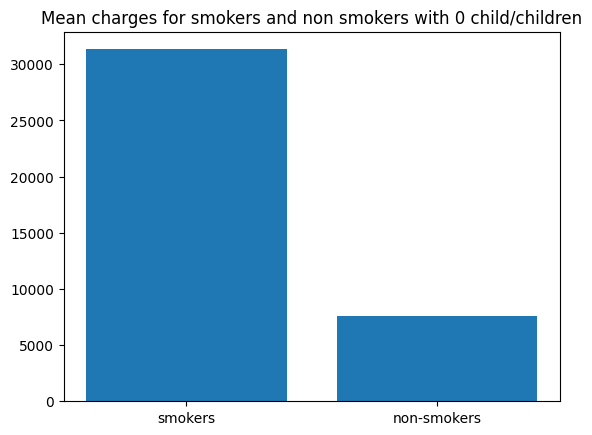

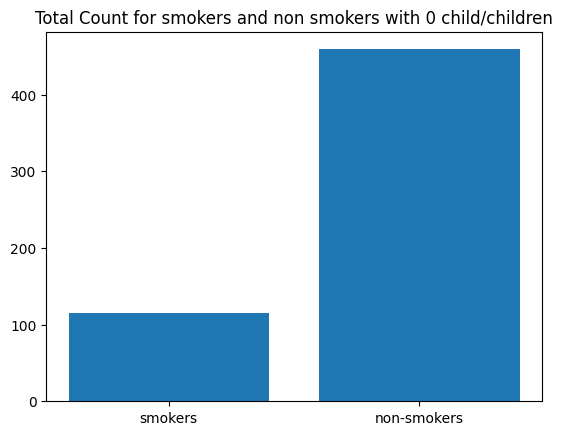

------------------------------------------------------------------------



Mean Smokers : 31341.36, Number of Smokers 115
Mean Non Smokers : 7611.79, Number of Non Smokers 459



------------------------------------------------------------------------


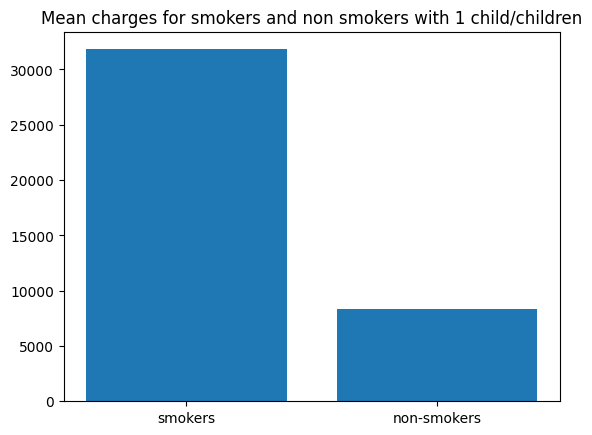

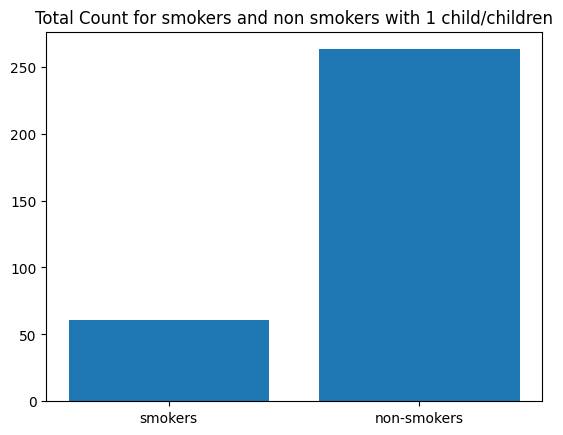

------------------------------------------------------------------------



Mean Smokers : 31822.65, Number of Smokers 61
Mean Non Smokers : 8303.11, Number of Non Smokers 263



------------------------------------------------------------------------


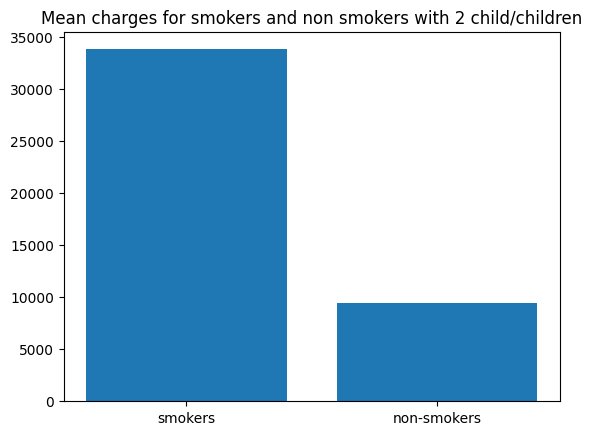

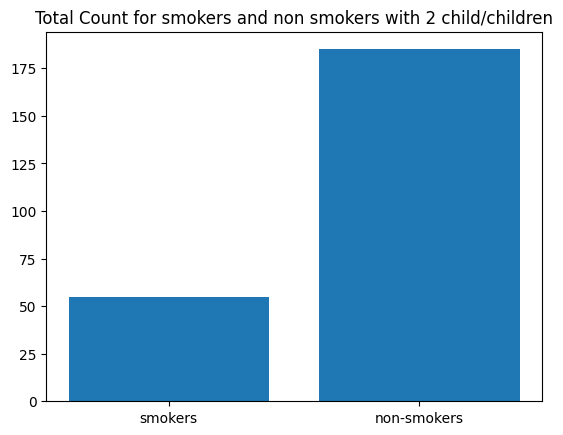

------------------------------------------------------------------------



Mean Smokers : 33844.24, Number of Smokers 55
Mean Non Smokers : 9493.09, Number of Non Smokers 185



------------------------------------------------------------------------


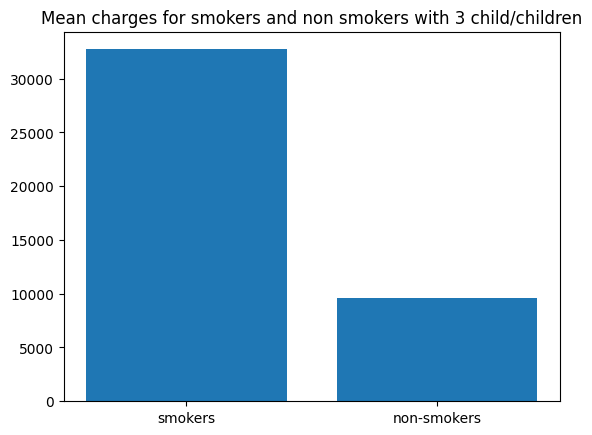

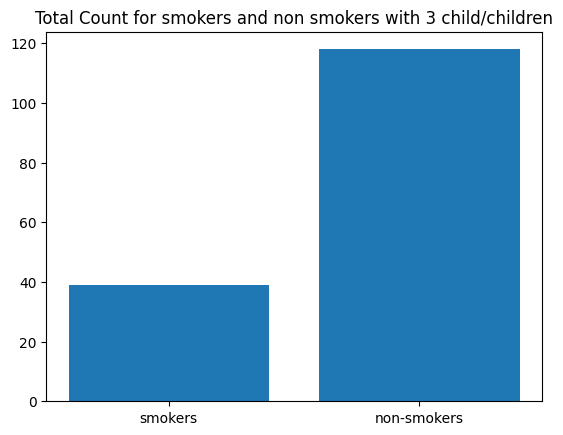

------------------------------------------------------------------------



Mean Smokers : 32724.92, Number of Smokers 39
Mean Non Smokers : 9614.52, Number of Non Smokers 118



------------------------------------------------------------------------


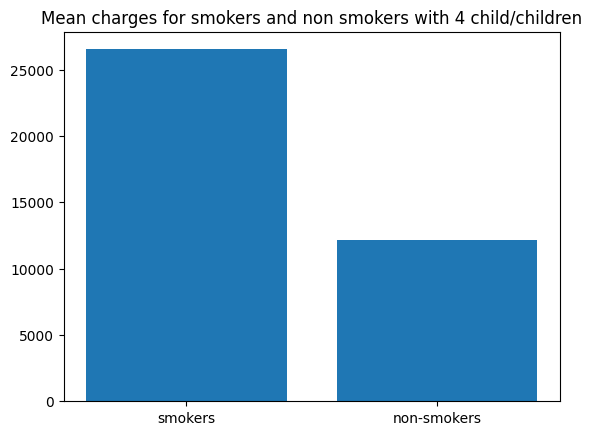

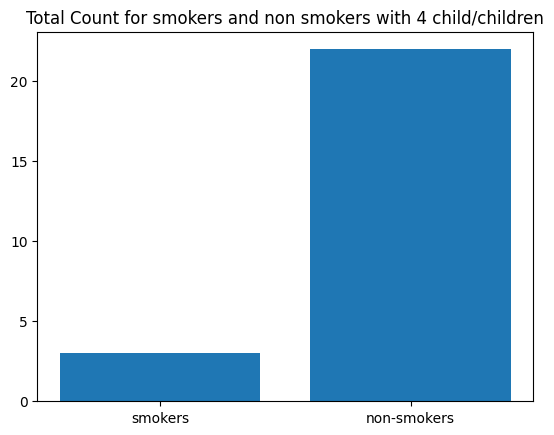

------------------------------------------------------------------------



Mean Smokers : 26532.28, Number of Smokers 3
Mean Non Smokers : 12121.34, Number of Non Smokers 22



------------------------------------------------------------------------


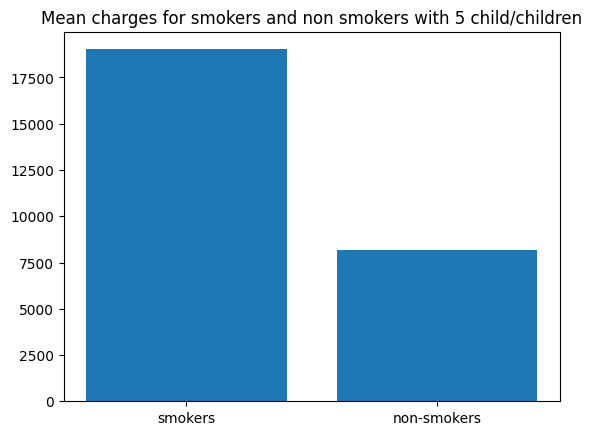

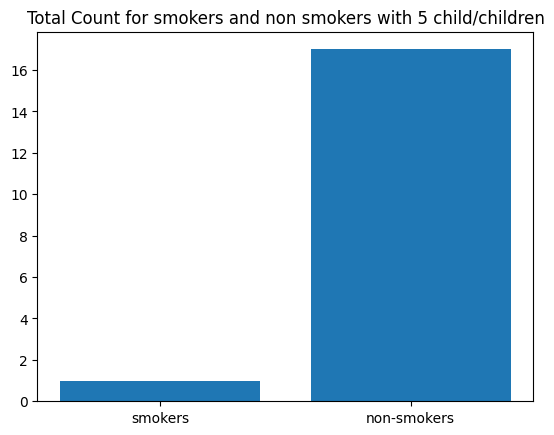

------------------------------------------------------------------------



Mean Smokers : 19023.26, Number of Smokers 1
Mean Non Smokers : 8183.85, Number of Non Smokers 17



------------------------------------------------------------------------


In [73]:
for element in smokers_map:
  mean_smokers = np.mean(smokers_map[element].charges)
  mean_non_smokers = np.mean(non_smokers_map[element].charges)
  number_of_smokers = len(smokers_map[element])
  number_of_non_smokers = len(non_smokers_map[element])
  height = 3
  plt.bar(["smokers", "non-smokers"], [mean_smokers, mean_non_smokers])
  plt.title(f"Mean charges for smokers and non smokers with {element} child/children")
  plt.show()
  for i in range(height):
    print()
  plt.bar(["smokers", "non-smokers"], [number_of_smokers, number_of_non_smokers])
  plt.title(f"Total Count for smokers and non smokers with {element} child/children")
  plt.show()
  print("------------------------------------------------------------------------")
  for i in range(height):
    print()
  print(f"Mean Smokers : {round(mean_smokers, 2)}, Number of Smokers {number_of_smokers}")
  print(f"Mean Non Smokers : {round(mean_non_smokers, 2)}, Number of Non Smokers {number_of_non_smokers}")
  for i in range(height):
    print()
  print("------------------------------------------------------------------------")

In [79]:
mean_smoker_list = [np.mean(smokers_map[element].charges) for element in smokers_map]
mean_smoker_count= [len(smokers_map[element]) for element in smokers_map]
mean_smoker_child_count = [element for element in smokers_map]
mean_non_smoker_list = [np.mean(non_smokers_map[element].charges) for element in non_smokers_map]
mean_non_smoker_count= [len(non_smokers_map[element]) for element in non_smokers_map]
mean_non_smoker_child_count = [element for element in non_smokers_map]

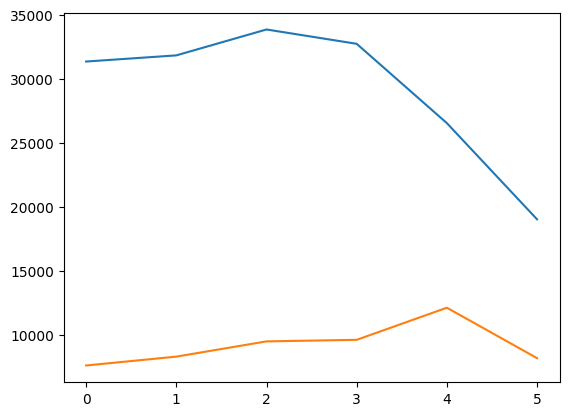

In [80]:
plt.plot(mean_smoker_child_count, mean_smoker_list)
plt.plot(mean_non_smoker_child_count, mean_non_smoker_list)
plt.show()